### <center>Supervised Machine Learning Methods and Algorithms Assignment 2</center>


#### <center>zx9hXIR2W2_Assign_2_SL<center>

A. Perform all necessary exploratory data analysis on the data, and divide the data
into an appropriate training and testing set (70% for training).

1- exploratory data analysis on the data.

In [180]:
#Import of the module

import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, balanced_accuracy_score,f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix,roc_auc_score, roc_curve
from sklearn_lvq import GlvqModel
from tqdm import tqdm
import imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [181]:
#importing the dataset
data = pd.read_csv('Bmi-Data-1.csv')
data.head()

,Level,Faculty,Gender,Age,Family_Size,obese,Income,Daily_Eating,Fruit_Intake,BMI_Aware,SleepingHours,Exercise_Freq,needhelp,Needapp
0,4,2,2,20,6,1,2,2,2,1,3,3,1,1
1,2,1,1,21,9,0,2,2,3,4,3,2,1,2
2,4,1,1,21,6,0,3,2,4,2,2,4,1,1
3,4,1,1,22,3,0,2,3,3,2,3,2,2,1
4,2,2,2,18,4,0,1,1,2,2,2,3,2,2


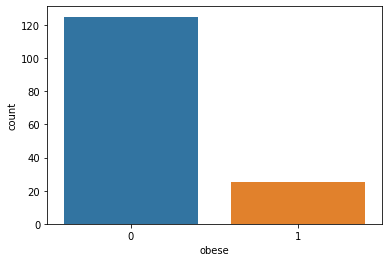

In [182]:
# Categorical variable analysis
sns.color_palette("husl", 8)
sns.countplot(data = data, x = 'obese')
plt.savefig('obese_count.jpg')

In [183]:
#checking %ration for both classes
data['obese'].value_counts(normalize=True)

0    0.833333
1    0.166667
Name: obese, dtype: float64

From the visualization above, it can be deduced that the target class which is the predicted value(obese) is imbalanced. 
Also, in terms of percentage, the 0 is about 83.3% while 1 is about 16.7%

### More Exploration

In [184]:
#Checking Statistical information

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,150.0,3.866667,1.826967,1.0,2.0,4.0,6.0,6.0
Faculty,150.0,1.713333,0.762693,1.0,1.0,2.0,2.0,3.0
Gender,150.0,1.506667,0.501630,1.0,1.0,2.0,2.0,2.0
Age,150.0,25.060000,9.481335,16.0,19.0,21.0,30.0,59.0
Family_Size,150.0,5.613333,1.805237,2.0,4.0,5.5,7.0,13.0
obese,150.0,0.166667,0.373927,0.0,0.0,0.0,0.0,1.0
Income,150.0,2.746667,0.844935,1.0,2.0,3.0,3.0,4.0
Daily_Eating,150.0,2.366667,0.699153,1.0,2.0,2.0,3.0,4.0
Fruit_Intake,150.0,2.346667,0.785666,1.0,2.0,2.0,3.0,4.0
BMI_Aware,150.0,1.966667,1.058153,1.0,1.0,2.0,3.0,4.0


In [185]:
#Checking shape of data
data.shape

(150, 14)

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Level          150 non-null    int64
 1   Faculty        150 non-null    int64
 2   Gender         150 non-null    int64
 3   Age            150 non-null    int64
 4   Family_Size    150 non-null    int64
 5   obese          150 non-null    int64
 6   Income         150 non-null    int64
 7   Daily_Eating   150 non-null    int64
 8   Fruit_Intake   150 non-null    int64
 9   BMI_Aware      150 non-null    int64
 10  SleepingHours  150 non-null    int64
 11  Exercise_Freq  150 non-null    int64
 12  needhelp       150 non-null    int64
 13  Needapp        150 non-null    int64
dtypes: int64(14)
memory usage: 16.5 KB


In [187]:
#Checking for presence of null values in the data

data.isna().sum()

Level            0
Faculty          0
Gender           0
Age              0
Family_Size      0
obese            0
Income           0
Daily_Eating     0
Fruit_Intake     0
BMI_Aware        0
SleepingHours    0
Exercise_Freq    0
needhelp         0
Needapp          0
dtype: int64

In [188]:
#Obtaining the columns list 

cat_cols = data.columns.tolist()
del cat_cols[0]
len(cat_cols)

13

### Bivariate Analysis based on the Target(obese)

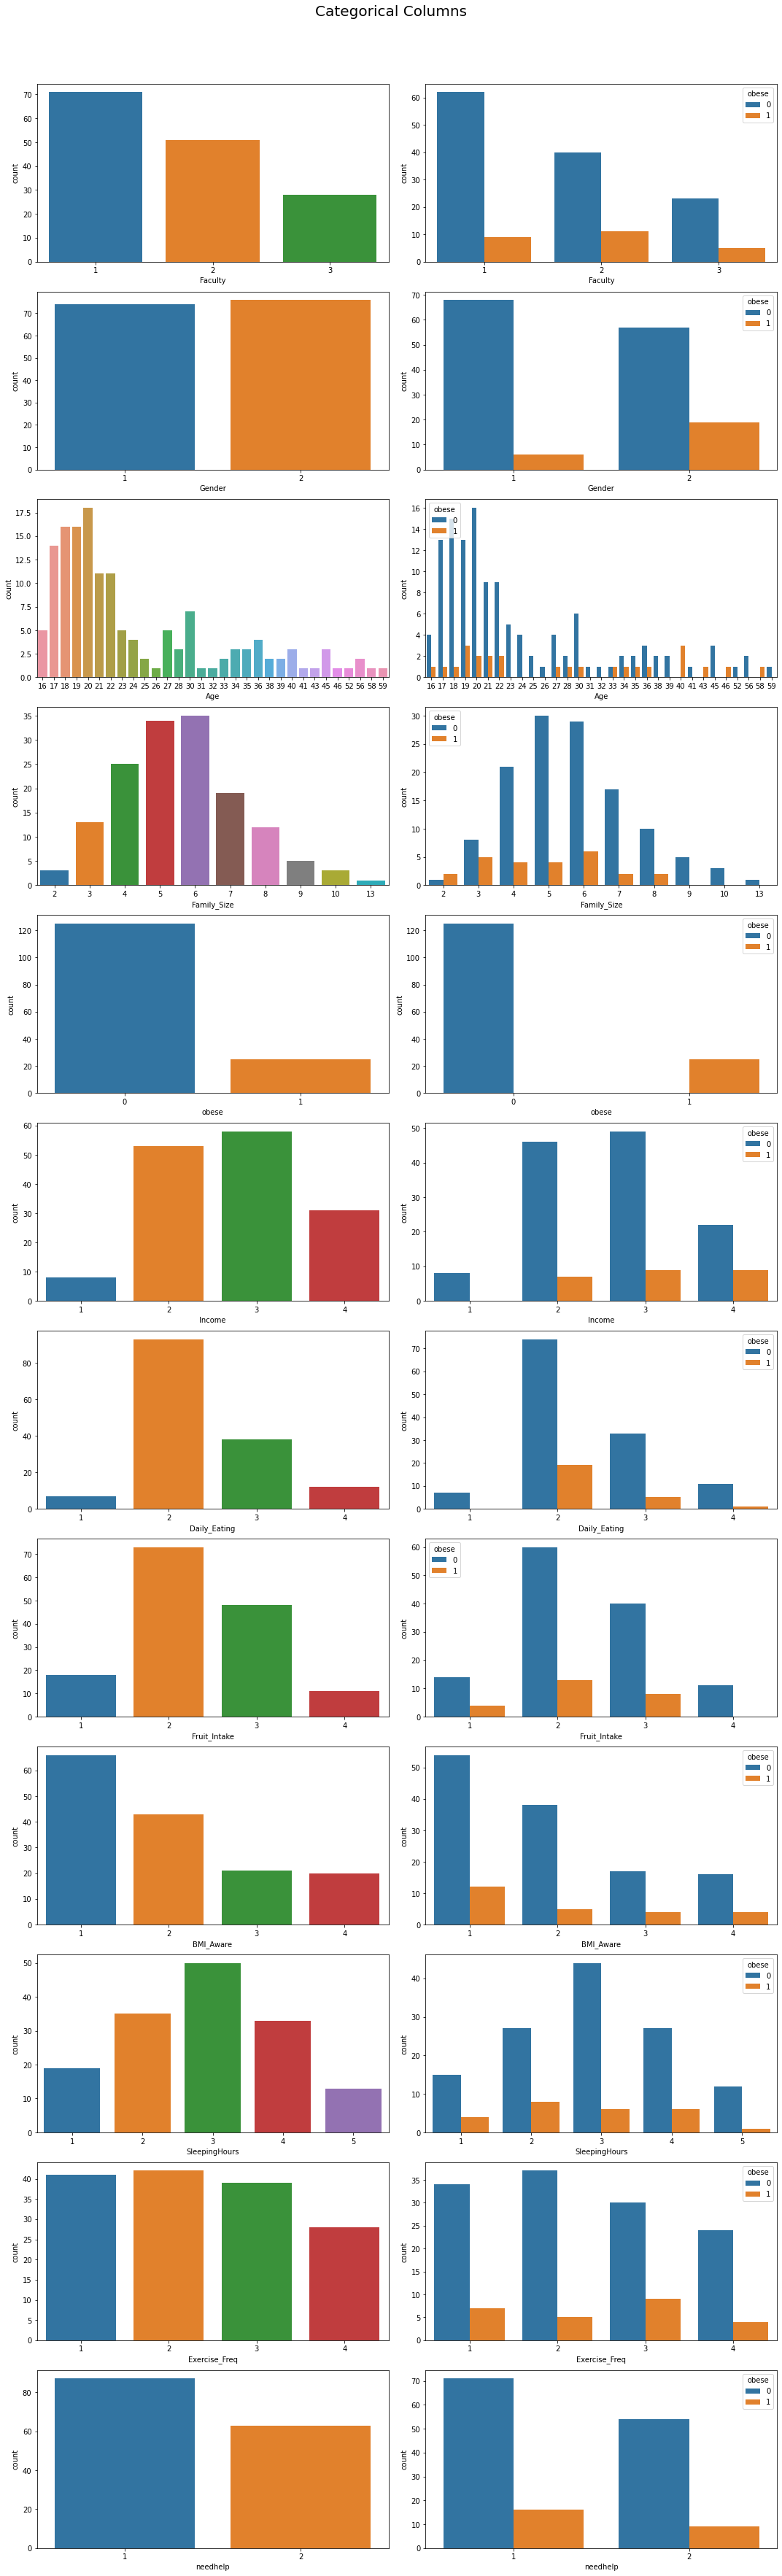

In [189]:
fig,ax = plt.subplots(12,2,figsize=(15,50))
for index,i in enumerate(cat_cols[:12]):
    sns.countplot(data=data,x=i,ax=ax[index,0])
    sns.countplot(data=data,x=i,ax=ax[index,1],hue='obese')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Categorical Columns",fontsize=20)
plt.savefig('Visualizing Categorical Columns with hue of obese.jpg')


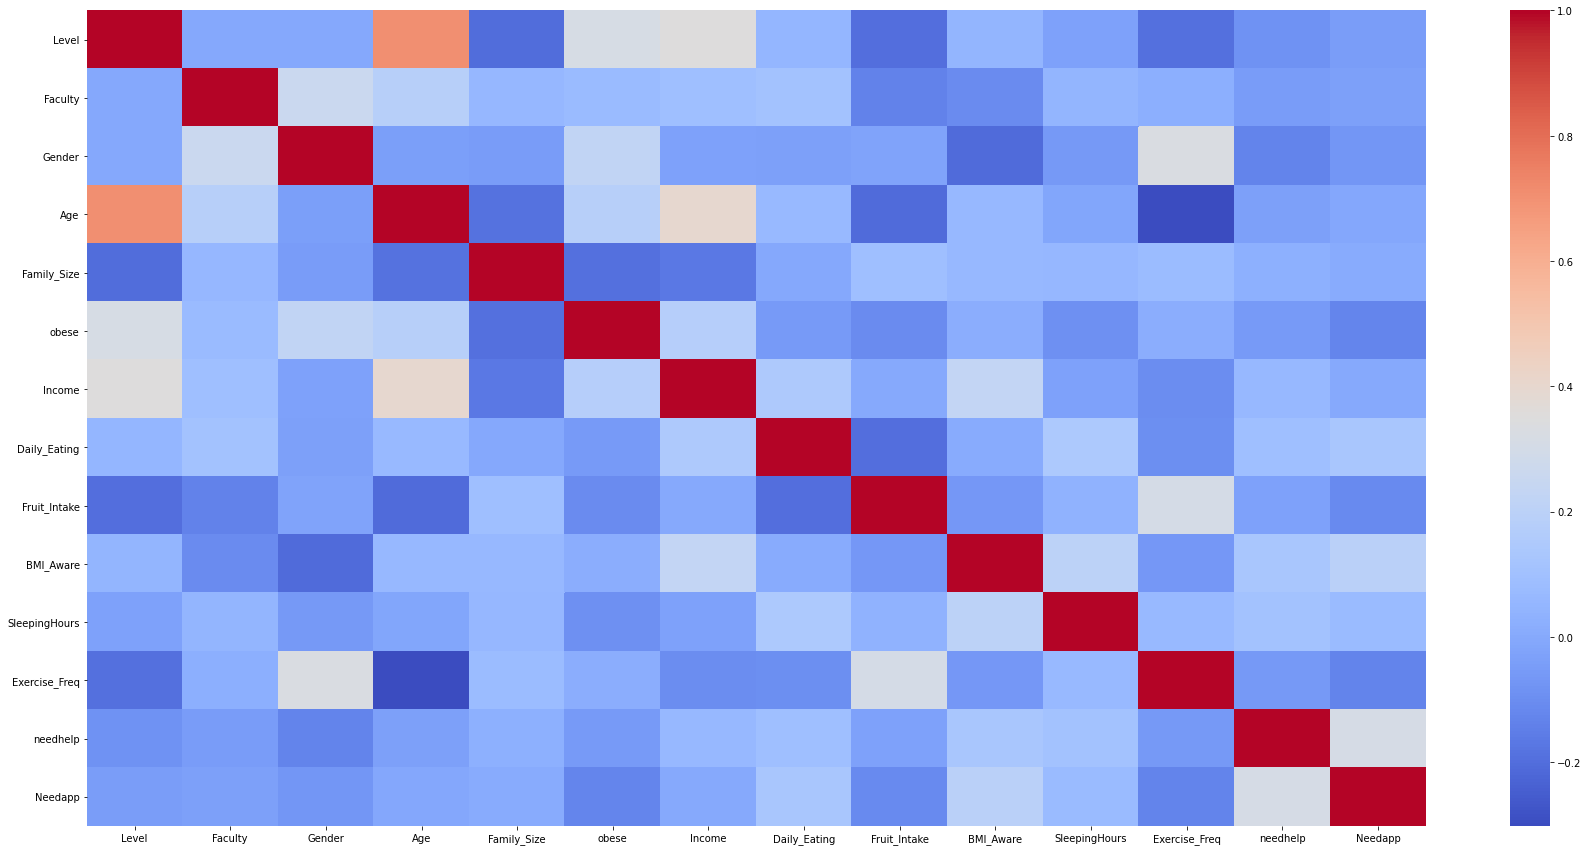

<Figure size 432x288 with 0 Axes>

In [190]:
#Correlation heatmap between the variables
corr = data.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr, cmap="coolwarm")
plt.show()
plt.savefig('correlation.jpg',bbox_inches='tight', dpi=150)

In [191]:
# Calculate the correlation matrix
corr_matrix = data.corr().unstack().sort_values().drop_duplicates()
# Display the correlation matrix
print(corr_matrix)

Exercise_Freq  Age             -0.301412
Fruit_Intake   Age             -0.209131
Gender         BMI_Aware       -0.208203
Level          Family_Size     -0.200915
               Fruit_Intake    -0.196690
                                  ...   
Gender         Exercise_Freq    0.331198
Level          Income           0.351874
Income         Age              0.398172
Age            Level            0.708333
Level          Level            1.000000
Length: 92, dtype: float64


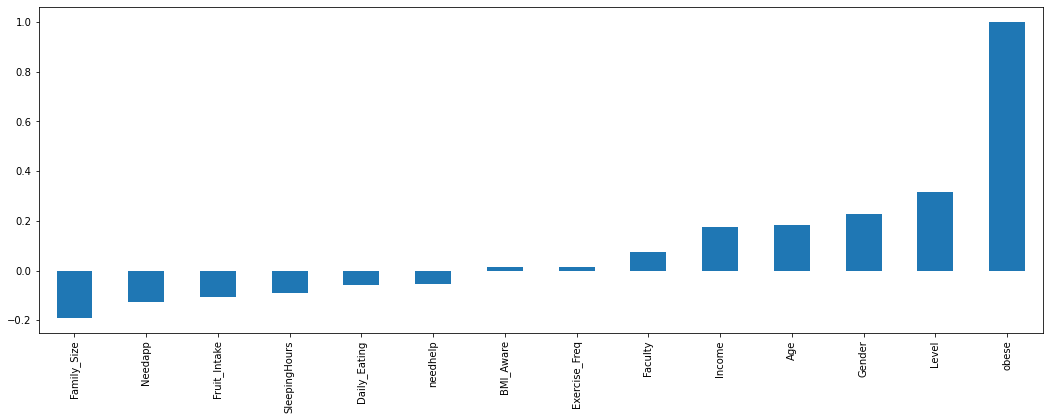

In [192]:
#Let's find the correlation between the independent and the dependent feature
data.corr()['obese'].sort_values().plot(kind='bar', figsize=(18, 6))
plt.savefig('corr_bar.jpg',bbox_inches='tight', dpi=150)

### training and testing set (70% for training)

In [193]:
# split the data into training and testing sets
X = data.drop(['obese'], axis=1)
y = data[['obese']]
              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 13)
(45, 13)
(105, 1)
(45, 1)


B. Perform feature selection using the ExtraTreesClassifier

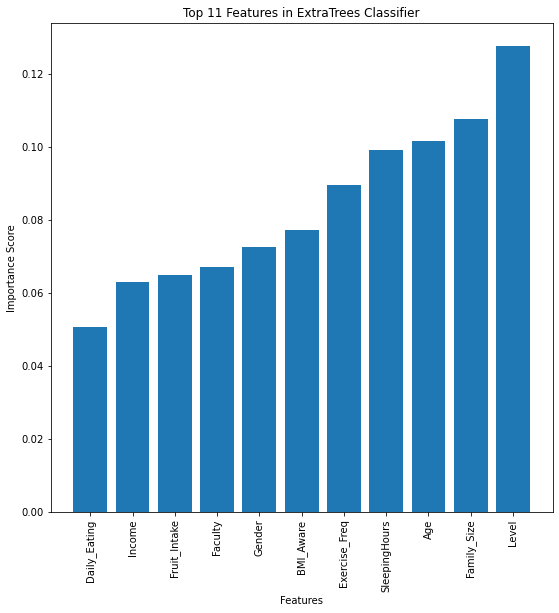

<Figure size 432x288 with 0 Axes>

In [194]:
# Building the model
extra = ExtraTreesClassifier(random_state = 123, n_estimators = 150, criterion = "entropy")
# Training the model
extra.fit(X_train, y_train)

# get feature importance scores from the trained model
importances = extra.feature_importances_

# get the top 11 features with the highest importance scores
indices = np.argsort(importances)[-11:]

col = X.columns.tolist()
plt.figure(figsize=(9, 9))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 11 Features in ExtraTrees Classifier")
plt.show()
plt.savefig('import_feature.jpg',bbox_inches='tight', dpi=150)

### C, D. Train the following models  and compute Accuracy 

### Before Oversampling

### Let's compute Accuracy, Balanced Accuracy, Sensitivity,Specificity, F1-Score, MCC and Precision

In [195]:
#Scale data
scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [251]:
# Set of the models

models = [("Logistic Regression", LogisticRegression(random_state=123)), 
         ("Linear Vectors Quantization", GlvqModel(random_state=123)),
         ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
         ("KNN", KNeighborsClassifier(n_neighbors=3)),
         ("Random Forest", RandomForestClassifier(random_state=123))] 

In [252]:
# Fitting and computation of metrics

model_results = pd.DataFrame(columns=["Model", "Accuracy Score"])


for clf_name, clf in tqdm(models):
    clf.fit(X_train_scale, y_train)
    predictions = clf.predict(X_test_scale)
    cm_logreg = confusion_matrix(y_test, predictions)
    score = accuracy_score(y_test, predictions)
    bal_score = balanced_accuracy_score(y_test, predictions)
    f1score =  f1_score(y_test, predictions)  
    mcc_logreg = matthews_corrcoef(y_test, predictions)
    precision_logreg = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    specificity_logreg = cm_logreg[0, 0] / (cm_logreg[0, 0] + cm_logreg[0, 1])
    new_row = {"Model": clf_name, "Accuracy Score": score, 'Balanced Accuracy Score':bal_score, 'F1_Score' : f1score, 'matthews corrcoef': mcc_logreg,
              'precision':precision_logreg, 'specificity': specificity_logreg, 'sensitivity': recall}
    model_results = model_results.append(new_row, ignore_index=True)
    
    
model_results.sort_values(by="Accuracy Score", ascending=False)

100%|██████████| 5/5 [00:00<00:00, 12.98it/s]


,Model,Accuracy Score,Balanced Accuracy Score,F1_Score,matthews corrcoef,precision,sensitivity,specificity
0,Logistic Regression,0.844444,0.616541,0.363636,0.296844,0.500000,0.285714,0.947368
1,Linear Vectors Quantization,0.844444,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000
2,Linear Discriminant Analysis,0.844444,0.616541,0.363636,0.296844,0.500000,0.285714,0.947368
4,Random Forest,0.844444,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000
3,KNN,0.755556,0.505639,0.153846,0.012025,0.166667,0.142857,0.868421


In [253]:
#Selection of the best model

models_ = [
    (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}),
    (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    (GlvqModel(), {'prototypes_per_class': [1, 2, 3]}), 
    (LinearDiscriminantAnalysis(), {})
]

# Perform grid search with cross-validation for each model
for model, param_grid in models_:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scale, y_train)

    # Print the best hyperparameters and corresponding score
    print(f"Best hyperparameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy: {grid_search.best_score_}")

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_scale)
    cm_logreg = confusion_matrix(y_test, predictions)
    test_accuracy = accuracy_score(y_test, predictions)
    bal_score = balanced_accuracy_score(y_test, predictions)
    f1score =  f1_score(y_test, predictions) 
    recall = recall_score(y_test, predictions)
    mcc_logreg = matthews_corrcoef(y_test, predictions)
    precision_logreg = precision_score(y_test, predictions)
    specificity_logreg = cm_logreg[0, 0] / (cm_logreg[0, 0] + cm_logreg[0, 1])
    print(f"Test accuracy for the best model: {test_accuracy}\n")
    print(f"balanced accuracy for the best model: {bal_score}\n")
    print(f"f1 score for the best model: {f1score}\n")
    print(f"precision score for the best model: {precision_logreg}\n")
    print(f"matthews corrcoef for the best model: {mcc_logreg}\n")
    print(f"specificity for the best model: {specificity_logreg}\n")
    print(f"sentitivity for the best model: {recall}\n")

Best hyperparameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 100}
Best cross-validated accuracy: 0.819047619047619
Test accuracy for the best model: 0.8444444444444444

balanced accuracy for the best model: 0.5

f1 score for the best model: 0.0

precision score for the best model: 0.0

matthews corrcoef for the best model: 0.0

specificity for the best model: 1.0

sentitivity for the best model: 0.0

Best hyperparameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best cross-validated accuracy: 0.8285714285714286
Test accuracy for the best model: 0.8444444444444444

balanced accuracy for the best model: 0.5

f1 score for the best model: 0.0

precision score for the best model: 0.0

matthews corrcoef for the best model: 0.0

specificity for the best model: 1.0

sentitivity for the best model: 0.0

Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validated accuracy: 0.8095238095238095
Test accuracy for the be

E. Interpret the fourfold plots of the confusion matrices of the models. Also, obtain the ROC and AUC scores of each model.

100%|██████████| 5/5 [00:00<00:00, 21.71it/s]


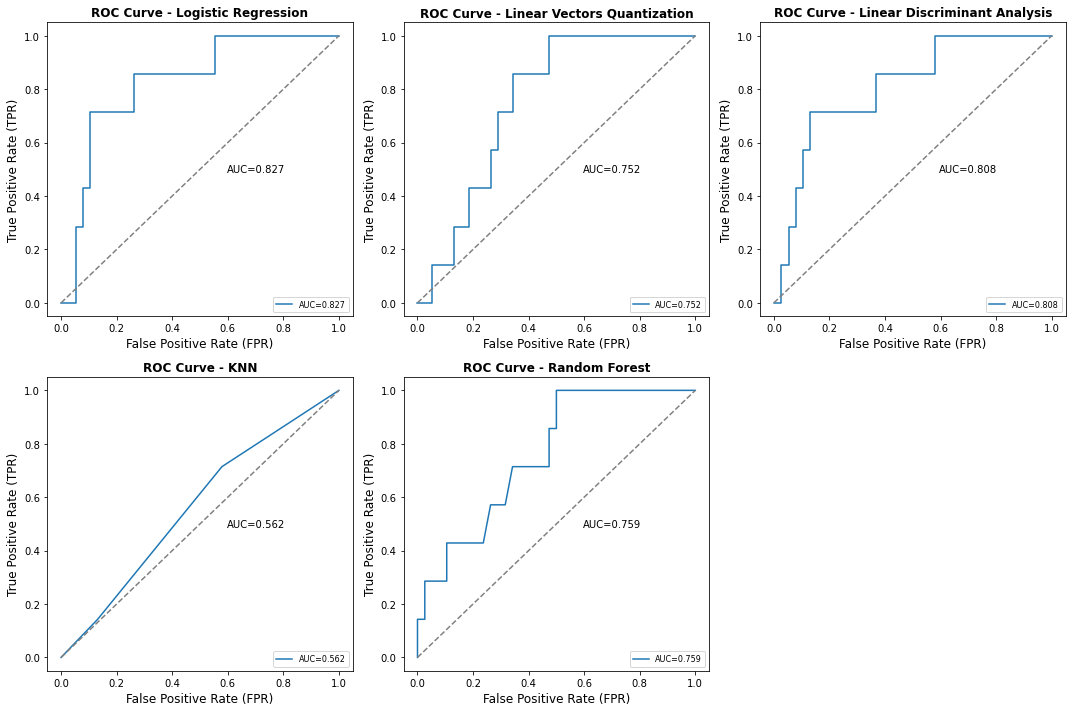

In [254]:
# ROC curves


best_models = [("Logistic Regression", LogisticRegression(C=0.1, penalty='l2', random_state=123)), 
         ("Linear Vectors Quantization", GlvqModel(prototypes_per_class=1)),
         ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
         ("KNN", KNeighborsClassifier(n_neighbors=3)),
         ("Random Forest", RandomForestClassifier(max_depth=20, n_estimators= 10))] 
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])
clf_names = []
# Train the models and record the results
for clf_name, clf in tqdm(models):
    clf_names.append(clf_name)
    model = clf.fit(X_train_scale, y_train)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scale)[:, 1]
    else:
        # For models without predict_proba, you may need to use decision_function or other appropriate method
        y_proba = model.decision_function(X_test_scale)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_value = roc_auc_score(y_test, y_proba)

    result_table = result_table.append({'classifiers': clf_name.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc_value}, ignore_index=True)

# Plot ROC curves in a matrix (2, 3)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, ax in enumerate(axs):
    if i < len(result_table):
        fpr = result_table.loc[i]['fpr']
        tpr = result_table.loc[i]['tpr']
        auc_value = result_table.loc[i]['auc']

        # Plot ROC curve
        ax.plot(fpr, tpr, label="AUC={:.3f}".format(auc_value))

        # Plot the diagonal line (random classifier)
        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

        # Set axis labels and title
        ax.set_xlabel("False Positive Rate (FPR)", fontsize=12)
        ax.set_ylabel("True Positive Rate (TPR)", fontsize=12)
        ax.set_title(f'ROC Curve - {clf_names[i]}', fontweight='bold', fontsize=12)

        # Display AUC value near the point (0.5, 0.5)
        ax.text(0.7, 0.5, f'AUC={auc_value:.3f}', ha='center', va='center', fontsize=10)

        # Add legend
        ax.legend(prop={'size': 8}, loc='lower right')
    else:
        fig.delaxes(ax)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


100%|██████████| 5/5 [00:00<00:00,  6.77it/s]


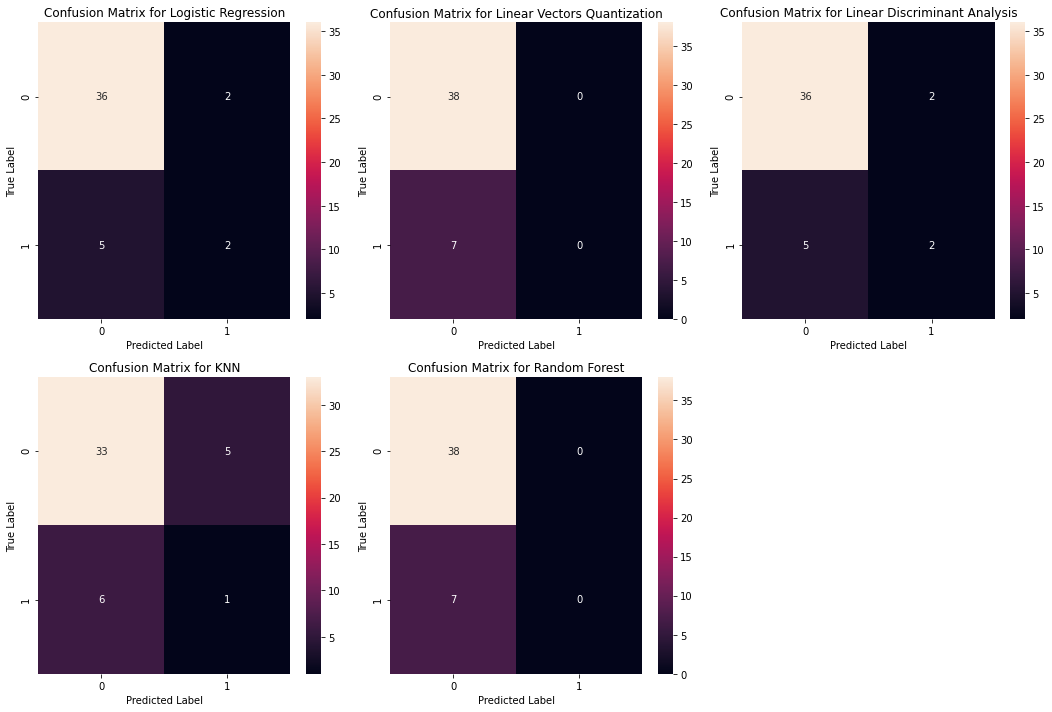

In [255]:
# Create an empty dictionary to store confusion matrices
confusion_matrices = {}

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axis array for easy indexing
ax = ax.flatten()

for i, (clf_name, clf) in enumerate(tqdm(models)):
    clf.fit(X_train_scale, y_train)
    predictions = clf.predict(X_test_scale)
    cm = confusion_matrix(y_test, predictions)
    confusion_matrices[clf_name] = cm
    
    # Plot confusion matrices for each classifier in a subplot
    sns.heatmap(cm, annot=True, ax=ax[i])
    ax[i].set_title(f"Confusion Matrix for {clf_name}")
    ax[i].set_ylabel("True Label")
    ax[i].set_xlabel("Predicted Label")

# Adjust layout to prevent overlap
plt.tight_layout()
fig.delaxes(ax[-1])
# Show the figure with all subplots
plt.show()

### Oversampling

In [259]:
# Create a SMOTE oversampler
smote = SMOTE(random_state=42)

# Fit the sampler on the training data and perform oversampling
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_t_resampled, y_t_resampled = smote.fit_resample(X_train_scale, y_train)
#X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

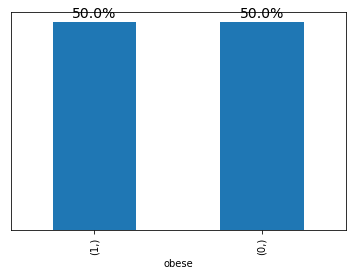

In [260]:
ax = y_t_resampled.value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

# Remove y axis
ax.get_yaxis().set_visible(False)

In [266]:
y_test.shape

(45, 1)

In [268]:
#Fit and Computation of the metrics

model_results = pd.DataFrame(columns=["Model", "Accuracy Score"])


for clf_name, clf in tqdm(models):
    clf.fit(X_t_resampled, y_t_resampled)
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    #predictions = clf.predict(X_test_sample)
    score = accuracy_score(y_test, predictions)
    bal_score = balanced_accuracy_score(y_test, predictions)
    f1score =  f1_score(y_test, predictions)  
    mcc_logreg = matthews_corrcoef(y_test, predictions)
    precision_logreg = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    specificity_logreg = cm[0,0] / (cm[0,0] + cm[0, 1])
    new_row = {"Model": clf_name, "Accuracy Score": score, 'Balanced Accuracy Score':bal_score, 'F1_Score' : f1score, 'matthews corrcoef': mcc_logreg,
              'precision':precision_logreg, 'specificity': specificity_logreg, 'sensitivity': recall}
    model_results = model_results.append(new_row, ignore_index=True)
    
    
model_results.sort_values(by="Accuracy Score", ascending=False)

100%|██████████| 5/5 [00:00<00:00, 11.12it/s]


,Model,Accuracy Score,Balanced Accuracy Score,F1_Score,matthews corrcoef,precision,sensitivity,specificity
0,Logistic Regression,0.844444,0.500000,0.000000,0.000000,0.000000,0.0,1.000000
2,Linear Discriminant Analysis,0.844444,0.500000,0.000000,0.000000,0.000000,0.0,1.000000
4,Random Forest,0.844444,0.500000,0.000000,0.000000,0.000000,0.0,1.000000
3,KNN,0.822222,0.486842,0.000000,-0.064704,0.000000,0.0,0.973684
1,Linear Vectors Quantization,0.155556,0.500000,0.269231,0.000000,0.155556,1.0,0.000000


Interpret the fourfold plots of the confusion matrices of the models. Also, obtain the ROC and AUC scores of each model.

In [230]:
#Selection of the best model

models_ = [
    (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}),
    (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    (GlvqModel(), {'prototypes_per_class': [1, 2, 3]}), 
    (LinearDiscriminantAnalysis(), {})
]

# Perform grid search with cross-validation for each model
for model, param_grid in models_:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_sample, y_train_sample)

    # Print the best hyperparameters and corresponding score
    print(f"Best hyperparameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy: {grid_search.best_score_}")

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_sample)
    cm_logreg = confusion_matrix(y_test_sample, predictions)
    test_accuracy = accuracy_score(y_test_sample, predictions)
    bal_score = balanced_accuracy_score(y_test_sample, predictions)
    f1score =  f1_score(y_test_sample, predictions)  
    mcc_logreg = matthews_corrcoef(y_test_sample, predictions)
    recall = recall_score(y_test_sample, predictions)
    precision_logreg = precision_score(y_test_sample, predictions)
    specificity_logreg = cm_logreg[0,0] / (cm_logreg[0,0] + cm_logreg[0, 1])
    print(f"Test accuracy for the best model: {test_accuracy}\n")
    print(f"balanced accuracy for the best model: {bal_score}\n")
    print(f"f1 score for the best model: {f1score}\n")
    print(f"precision score for the best model: {precision_logreg}\n")
    print(f"matthews corrcoef for the best model: {mcc_logreg}\n")
    print(f"specificity for the best model: {specificity_logreg}\n")
    print(f"sentivity for the best model: {recall}\n")

Best hyperparameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 50}
Best cross-validated accuracy: 0.8513333333333334
Test accuracy for the best model: 0.8301886792452831

balanced accuracy for the best model: 0.829059829059829

f1 score for the best model: 0.8421052631578948

precision score for the best model: 0.8

matthews corrcoef for the best model: 0.6638177701435687

specificity for the best model: 0.7692307692307693

sentivity for the best model: 0.8888888888888888

Best hyperparameters for LogisticRegression: {'C': 1, 'penalty': 'l2'}
Best cross-validated accuracy: 0.752
Test accuracy for the best model: 0.7547169811320755

balanced accuracy for the best model: 0.7542735042735043

f1 score for the best model: 0.7636363636363638

precision score for the best model: 0.75

matthews corrcoef for the best model: 0.5092729860879863

specificity for the best model: 0.7307692307692307

sentivity for the best model: 0.7777777777777778

Best hyperparameters for KNeigh

100%|██████████| 5/5 [00:00<00:00, 22.34it/s]


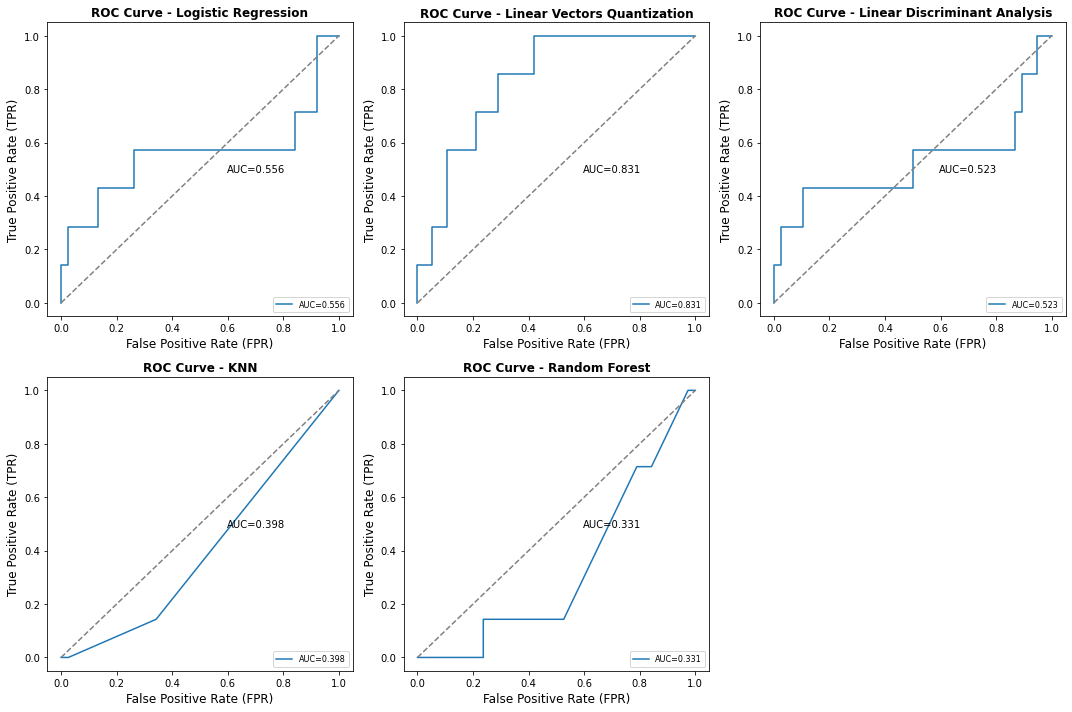

In [270]:
# ROC curves


best_models = [("Logistic Regression", LogisticRegression(random_state=123)), 
         ("Linear Vectors Quantization", GlvqModel(prototypes_per_class=2)),
         ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
         ("KNN", KNeighborsClassifier(n_neighbors=3, weights='distance')),
         ("Random Forest", RandomForestClassifier(random_state=123))] 
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])
clf_names = []
# Train the models and record the results
for clf_name, clf in tqdm(models):
    clf_names.append(clf_name)
    model = clf.fit(X_t_resampled, y_t_resampled)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, you may need to use decision_function or other appropriate method
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_value = roc_auc_score(y_test, y_proba)

    result_table = result_table.append({'classifiers': clf_name.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc_value}, ignore_index=True)

# Plot ROC curves in a matrix (2, 3)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, ax in enumerate(axs):
    if i < len(result_table):
        fpr = result_table.loc[i]['fpr']
        tpr = result_table.loc[i]['tpr']
        auc_value = result_table.loc[i]['auc']

        # Plot ROC curve
        ax.plot(fpr, tpr, label="AUC={:.3f}".format(auc_value))

        # Plot the diagonal line (random classifier)
        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

        # Set axis labels and title
        ax.set_xlabel("False Positive Rate (FPR)", fontsize=12)
        ax.set_ylabel("True Positive Rate (TPR)", fontsize=12)
        ax.set_title(f'ROC Curve - {clf_names[i]}', fontweight='bold', fontsize=12)

        # Display AUC value near the point (0.5, 0.5)
        ax.text(0.7, 0.5, f'AUC={auc_value:.3f}', ha='center', va='center', fontsize=10)

        # Add legend
        ax.legend(prop={'size': 8}, loc='lower right')
    else:
        fig.delaxes(ax)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


100%|██████████| 5/5 [00:00<00:00,  5.18it/s]


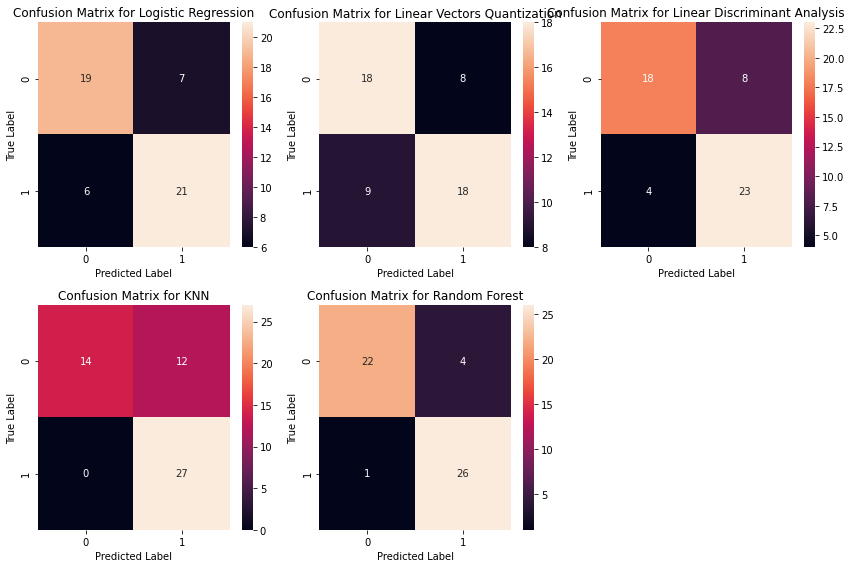

In [225]:
# Create an empty dictionary to store confusion matrices
confusion_matrices = {}

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axis array for easy indexing
ax = ax.flatten()

for i, (clf_name, clf) in enumerate(tqdm(best_models)):
    clf.fit(X_train_sample, y_train_sample)
    predictions = clf.predict(X_test_sample)
    cm = confusion_matrix(y_test_sample, predictions)
    confusion_matrices[clf_name] = cm

    # Plot confusion matrices for each classifier in a subplot
    sns.heatmap(cm, annot=True, ax=ax[i])
    ax[i].set_title(f"Confusion Matrix for {clf_name}")
    ax[i].set_ylabel("True Label")
    ax[i].set_xlabel("Predicted Label")

# Adjust layout to prevent overlap
plt.tight_layout()
fig.delaxes(ax[-1])
# Show the figure with all subplots
plt.show()
